# Blizzard Commodities DataFrame (79+M rows)

## Data pulled hourly between 2023-12-22 19:41:00 and 2024-01-03 12:41:00

## Imports Section

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import os
import numpy as np
import statistics
import ctypes
from datetime import datetime
from random import sample

## Open csv / Load to DF

In [3]:
start=datetime.now()
display(f"({start}) Loading csv file ...")
Blizzard_Commodities_DF=pd.read_csv('commodities_data.csv')
Blizzard_Commodities_DF.shape
display(f"(Time to load : {datetime.now()-start}")

'(2024-01-10 09:25:34.300613) Loading csv file ...'

'(Time to load : 0:01:01.205907'

## Find na/NaN values

In [3]:
Blizzard_Commodities_DF.isna().sum()

id            0
quantity      0
unit_price    0
time_left     0
item.id       0
item.name     0
item.class    0
datetime      0
dtype: int64

## DF Structure (Review/Correct)

In [4]:
Blizzard_Commodities_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   id          int64 
 1   quantity    int64 
 2   unit_price  int64 
 3   time_left   object
 4   item.id     int64 
 5   item.name   object
 6   item.class  object
 7   datetime    object
dtypes: int64(4), object(4)
memory usage: 4.8+ GB


In [5]:
start=datetime.now()

In [6]:
# Change datedime columns to datetime
Blizzard_Commodities_DF['datetime'] = pd.to_datetime(Blizzard_Commodities_DF['datetime'])

In [7]:
# Change id columns to string
display(f"({start}) Re-Casting id columns ...")
Blizzard_Commodities_DF['id']=Blizzard_Commodities_DF['id'].astype(str)
Blizzard_Commodities_DF['item.id']=Blizzard_Commodities_DF['item.id'].astype(str)
display(f"(Time to cast : {datetime.now()-start}")

'(2024-01-08 19:31:10.686598) Re-Casting id columns ...'

'(Time to cast : 0:00:52.063704'

In [7]:
# Verifiy change
Blizzard_Commodities_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          object        
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     object        
 5   item.name   object        
 6   item.class  object        
 7   datetime    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 4.8+ GB


## Data Overview

In [8]:
Blizzard_Commodities_DF

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
0,1899749198,15,109400,SHORT,184090,Potion of the Psychopomp's Speed,Consumables,2023-12-28 15:41:00
1,1899749311,1,2000,SHORT,168650,Cragscale,Trade Goods,2023-12-28 15:41:00
2,1899749353,6,2400,SHORT,152576,Tidespray Linen,Trade Goods,2023-12-28 15:41:00
3,1899749415,2,290200,SHORT,76885,Burning Primal Diamond,Gems,2023-12-28 15:41:00
4,1899749701,1,9707000,SHORT,139362,Glyph of Mana Touched Souls,Glyphs,2023-12-28 15:41:00
...,...,...,...,...,...,...,...,...
79852825,1910242848,12,25200,VERY_LONG,197755,Lava Beetle,Trade Goods,2023-12-29 00:41:00
79852826,1910242860,3,30600,VERY_LONG,191465,Saxifrage,Trade Goods,2023-12-29 00:41:00
79852827,1910242862,3,1500000,VERY_LONG,193227,Stonecrust Hide,Trade Goods,2023-12-29 00:41:00
79852828,1910242863,2,25200,VERY_LONG,197755,Lava Beetle,Trade Goods,2023-12-29 00:41:00


### Initial Value Analisys by Column

- id

In [9]:
Blizzard_Commodities_DF['id'].value_counts()

id
1892309585    50
1920662957    50
1920664843    50
1920664735    50
1892307074    50
              ..
1918269591     1
1918269568     1
1918269565     1
1918269561     1
1910242863     1
Name: count, Length: 6964297, dtype: int64

- id .. from this we can tell auctions last no more than 50 hrs, a bit over 2 days.

<Axes: xlabel='id'>

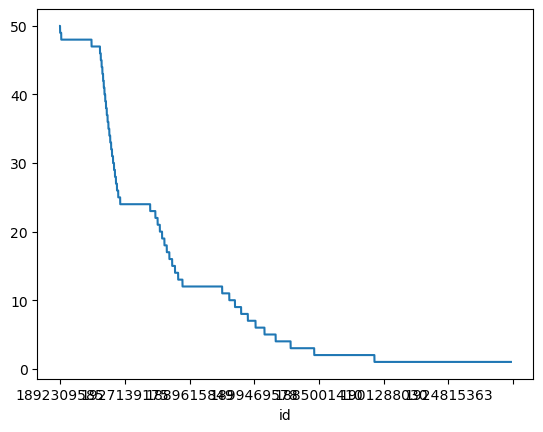

In [10]:
Blizzard_Commodities_DF['id'].value_counts().plot()

In [5]:
auction_id_cc=pd.DataFrame(Blizzard_Commodities_DF['id'].value_counts().value_counts())
auction_id_cc.rename(columns={'count':"repetitions"}, inplace=True)
auction_id_cc.reset_index(inplace=True)
auction_id_cc.sort_values('count',inplace=True)
auction_id_cc.reset_index(drop=True,inplace=True)
auction_id_cc['percentage']=(auction_id_cc['repetitions']/6964297)*100
auction_id_cc['percentage'].iloc[0:2].sum()

43.63794364312723

In [251]:
auction_id_cc['percentage'].iloc[11]

8.800443174666444

In [6]:
auction_id_cc

,count,repetitions,percentage
0,1,2109005,30.283100
1,2,930071,13.354844
2,3,364507,5.233938
3,4,231023,3.317248
4,5,172418,2.475742
5,6,138057,1.982354
6,7,119175,1.711228
7,8,103680,1.488736
8,9,95134,1.366024
9,10,87794,1.260630


In [7]:
xticks=[]
for x in range(26):
    xticks.append(x*2)
yticks=[]
for y in range(12):
    yticks.append(y*200000)
    

Text(20, 1500000, '43.64% of Auctions last 2 hours or less\n8.80% last 12 hrs, 6.65% last 24 hrs\nand 6.72 last 48 hrs ')

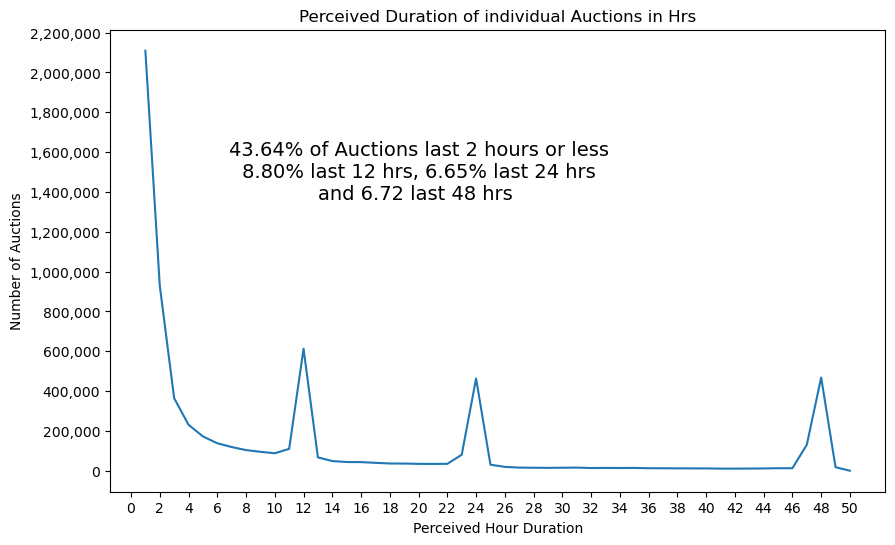

In [8]:
y=auction_id_cc['repetitions']
x=auction_id_cc['count']
fig, ax = plt.subplots(figsize=(10, 6)) #, layout='constrained'
plt.xticks(xticks)
plt.yticks(yticks)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))

ax.plot(x, y)  # Plot some data on the axes.
ax.set_xlabel('Perceived Hour Duration')  # Add an x-label to the axes.
ax.set_ylabel('Number of Auctions')  # Add a y-label to the axes.
ax.set_title("Perceived Duration of individual Auctions in Hrs")  # Add a title to the axes.
ax.text(20,1500000,f"{auction_id_cc['percentage'].iloc[0:2].sum():.2f}% of Auctions last 2 hours or less\n8.80% last 12 hrs, 6.65% last 24 hrs\nand 6.72 last 48 hrs ",ha='center', va='center', fontsize=14)
# ax.legend()  # Add a legend.

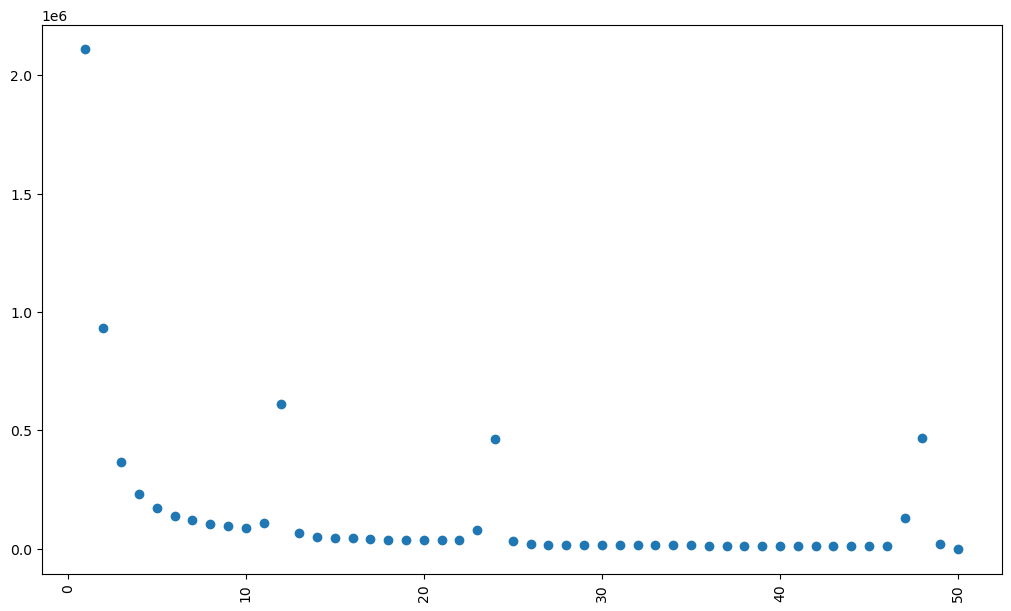

In [96]:
# plt.xlim=(0,100)
x=auction_id_cc['count']
y=auction_id_cc['repetitions']
fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
plt.scatter(x,y)
plt.xticks(rotation='vertical')
plt.show()


- quantity

In [11]:

auction_quantity_cc=pd.DataFrame(Blizzard_Commodities_DF['quantity'].value_counts().value_counts())
auction_quantity_cc.rename(columns={'count':"repetitions"}, inplace=True)
auction_quantity_cc.reset_index(inplace=True)
auction_quantity_cc.rename(columns={'count':"quantity"}, inplace=True)
auction_quantity_cc.sort_values('quantity',inplace=True)
auction_quantity_cc.reset_index(drop=True,inplace=True)
auction_quantity_cc['percentage']=(auction_quantity_cc['repetitions']/auction_id_cc['repetitions'].sum())*100
auction_quantity_cc
auction_quantity_cc

,quantity,repetitions,percentage
0,1,3482,0.049998
1,2,2805,0.040277
2,3,1025,0.014718
3,4,704,0.010109
4,5,494,0.007093
...,...,...,...
1673,4226175,1,0.000014
1674,5073014,1,0.000014
1675,6293980,1,0.000014
1676,10361141,1,0.000014


<Axes: >

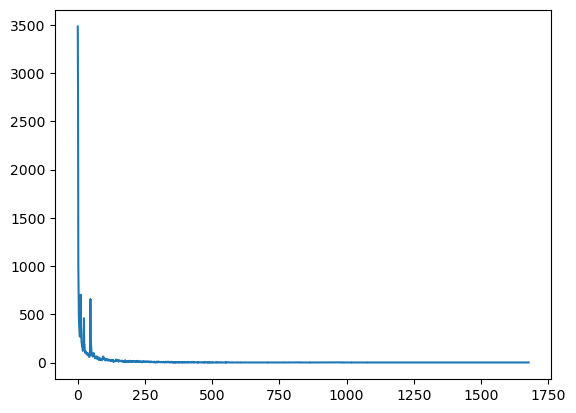

In [12]:
# auction_quantity_cc[['quantity','repetitions']].plot()
# auction_quantity_cc['quantity'].plot()
auction_quantity_cc['repetitions'].plot()

<Axes: >

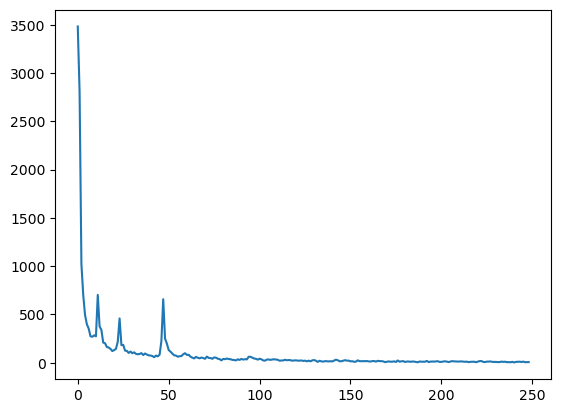

In [13]:
auction_quantity_cc['repetitions'].loc[auction_quantity_cc['quantity']<250].plot()

<Axes: >

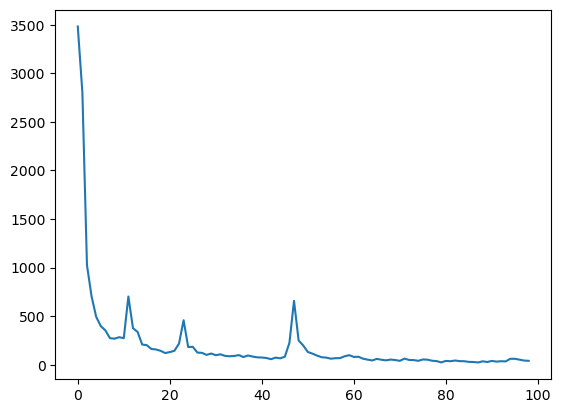

In [14]:
auction_quantity_cc['repetitions'].loc[auction_quantity_cc['quantity']<100].plot()

In [15]:
Blizzard_Commodities_DF['id'].value_counts()

id
1892309585    50
1920662957    50
1920664843    50
1920664735    50
1892307074    50
              ..
1918269591     1
1918269568     1
1918269565     1
1918269561     1
1910242863     1
Name: count, Length: 6964297, dtype: int64

In [16]:
auction_quantity_cc['repetitions'].loc[auction_quantity_cc['quantity']<100].sum()/auction_quantity_cc['quantity'].sum()*100

0.025355964906733582

In [17]:
Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['id']=='1920664843'].sort_values('datetime')

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime


## Let's start analysing quantity offered, auction duration and  offered quantity changed

### Get a list of unique id's

In [18]:
list_of_ids=Blizzard_Commodities_DF['id'].unique()
list_of_ids

array([1899749198, 1899749311, 1899749353, ..., 1910242860, 1910242862,
       1910242863], dtype=int64)

### Record Auction id, item.name, auction perceived duration, initial offered quantity, quantity difference on last entry

In [291]:
# first attempt before droping rows:  3666 ids in 155m 51.6s
auction_change_by_id=[]
progress=0
printed_text=""
total=len(list_of_ids)
for id in list_of_ids:
    temp_auction_list=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['id']==id] \
        .sort_values('datetime')
    auction={'id':id, 
             'item.name':temp_auction_list.iloc[0]['item.name'], 
             'duration':len(temp_auction_list), 
             'offered':temp_auction_list.iloc[0]['quantity'],
             'sold':temp_auction_list.iloc[0]['quantity']- \
                temp_auction_list.iloc[-1]['quantity']
             }
    auction_change_by_id.append(auction)
    for index in temp_auction_list.index:
        Blizzard_Commodities_DF.drop(index,axis=0)
    progress+=1
    printed_text=printed_text+f"{progress}/{total} ,"
    if len(printed_text)>80:
        print("\n", end='')
        printed_text=""

    print(f"{progress}/{total} DF Size {len(Blizzard_Commodities_DF)},", end='')

KeyboardInterrupt: 

In [19]:
temp_auction_list

NameError: name 'temp_auction_list' is not defined

In [265]:
temp_auction_list=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['id']=='1920664843'].sort_values('datetime')
temp_auction_list

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime
64489955,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 14:41:00
22409170,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 15:41:00
78417207,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 16:41:00
31915672,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 17:41:00
65253229,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 18:41:00
24848796,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 19:41:00
73288659,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 20:41:00
33564140,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 21:41:00
62446198,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 22:41:00
27365367,1920664843,20,16400,VERY_LONG,118391,Worm Supreme,Consumables,2023-12-31 23:41:00


In [273]:
auction={'id':temp_auction_list.iloc[0]['id'], 
             'item.name':temp_auction_list.iloc[0]['item.name'], 
             'duration':len(temp_auction_list), 
             'offered':temp_auction_list.iloc[0]['quantity'],
             'sold':temp_auction_list.iloc[0]['quantity']-temp_auction_list.iloc[-1]['quantity']
             }
auction

{'id': '1920664843',
 'item.name': 'Worm Supreme',
 'duration': 50,
 'offered': 20,
 'sold': 0}

In [270]:
len(temp_auction_list)

50

In [20]:
temp_auction_list.iloc[0]['item.name']

NameError: name 'temp_auction_list' is not defined

In [21]:
# Evenly distributed bins did not work
# bins=[]
# bin_index=[]
# for b in range(18):
#     bins.append(b*100)
#     bin_index.append(b*100)
bins=[0,100,200,500,1000,2000,5000,10000,20000,50000,100000,200000,500000,1000000,20000000]
len(bins)

15

In [22]:

binned_auction_quantity=pd.DataFrame(auction_quantity_cc.groupby(pd.cut(auction_quantity_cc['quantity'],bins)).size())
binned_auction_quantity.reset_index(inplace=True, drop=True)
binned_auction_quantity.rename(columns={0:'repetitions'}, inplace=True)
binned_auction_quantity['percentage']=(binned_auction_quantity['repetitions']/binned_auction_quantity['repetitions'].sum())*100

C:\Users\Fidel\AppData\Local\Temp\ipykernel_3508\88329472.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_auction_quantity=pd.DataFrame(auction_quantity_cc.groupby(pd.cut(auction_quantity_cc['quantity'],bins)).size())


In [23]:
binned_auction_quantity['repetitions'].sum()
binned_auction_quantity

,repetitions,percentage
0,100,5.963029
1,100,5.963029
2,289,17.233154
3,238,14.192010
4,314,18.723912
5,306,18.246869
6,102,6.082290
7,85,5.068575
8,62,3.697078
9,30,1.788909


In [28]:
xticks=[]
for x in range(26):
    xticks.append(x*2)
yticks=[]
for y in range(12):
    yticks.append(y*200000)    

In [33]:
bins.pop(0)
x,bins

(25,
 [100,
  200,
  500,
  1000,
  2000,
  5000,
  10000,
  20000,
  50000,
  100000,
  200000,
  500000,
  1000000,
  20000000])

Text(0.5, 1.0, 'Perceived Duration of individual Auctions in Hrs')

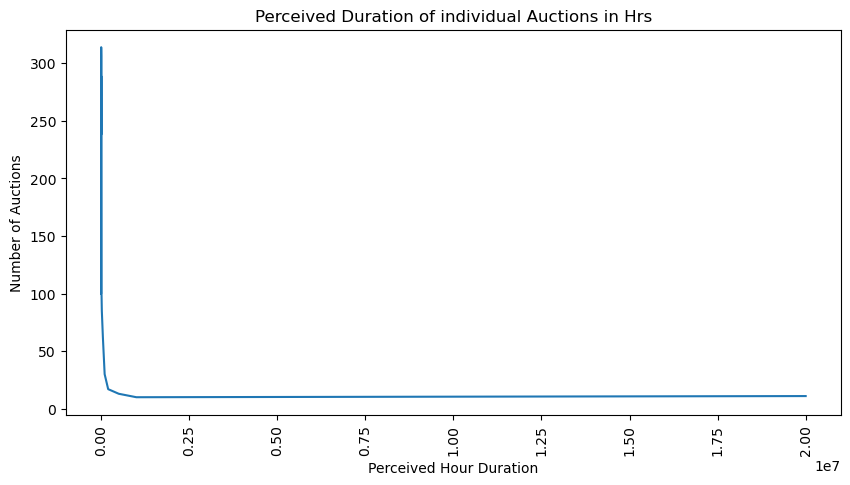

In [37]:
plt.xlim=(0,100)
# y=[]
# for bin_range in binned_auction_quantity['quantity']:
#     y.append(str(bin_range))
y=binned_auction_quantity['repetitions']
fig, ax = plt.subplots(figsize=(10, 5)) #, layout='constrained'
# plt.xticks(xticks)
# plt.yticks(yticks)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation='vertical')
ax.plot(bins, y)  # Plot some data on the axes.
ax.set_xlabel('Perceived Hour Duration')  # Add an x-label to the axes.
ax.set_ylabel('Number of Auctions')  # Add a y-label to the axes.
ax.set_title("Perceived Duration of individual Auctions in Hrs")  # Add a title to the axes.
# ax.text(20,1500000,f"{auction_id_cc['percentage'].iloc[0:2].sum():.4f}% of Auctions last 2 hours or less",ha='center', va='center', fontsize=14)
# ax.legend()  # Add a legend.

<Axes: xlabel='quantity'>

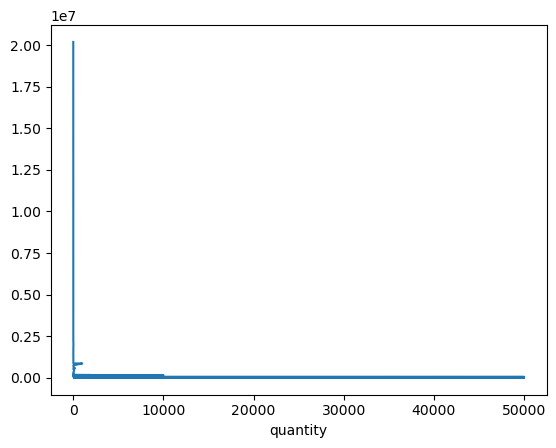

In [36]:
Blizzard_Commodities_DF['quantity'].value_counts().plot()

- unit_price

In [38]:
Blizzard_Commodities_DF['unit_price'].value_counts()

unit_price
700           2037633
10000         1270848
100           1110950
6300          1001087
50000          844017
               ...   
15999000            1
30002800            1
23478400            1
1600005100          1
2334800             1
Name: count, Length: 66443, dtype: int64

<Axes: xlabel='unit_price'>

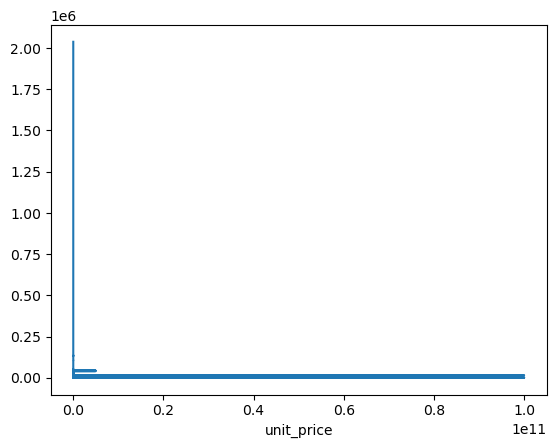

In [39]:
Blizzard_Commodities_DF['unit_price'].value_counts().plot()

- time_left

In [40]:
Blizzard_Commodities_DF['time_left'].value_counts()

time_left
VERY_LONG    52560381
LONG         23422910
MEDIUM        2911779
SHORT          957760
Name: count, dtype: int64

<Axes: xlabel='time_left'>

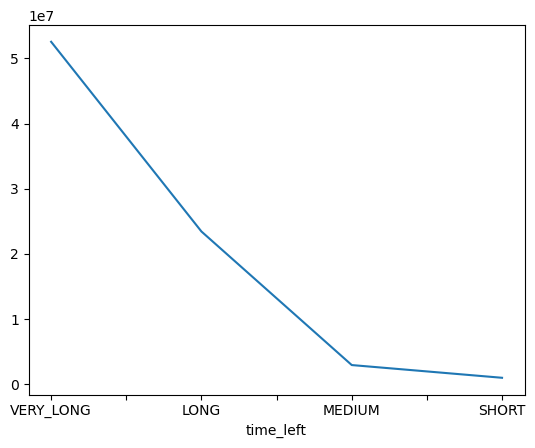

In [41]:
Blizzard_Commodities_DF['time_left'].value_counts().plot()

- item.id

- item.name

In [42]:
Blizzard_Commodities_DF['item.name'].value_counts() 

item.name
Fluorescent Fluid            978744
Exceptional Pelt             665069
Hochenblume                  497568
Adamant Scales               465241
Resilient Leather            454930
                              ...  
Masterful Mana Buns               2
Blood Soaked Tail                 1
Emberflea Collection              1
Elemental-Distilled Water         1
Extra Large Grooming Comb         1
Name: count, Length: 7964, dtype: int64

<Axes: xlabel='item.name'>

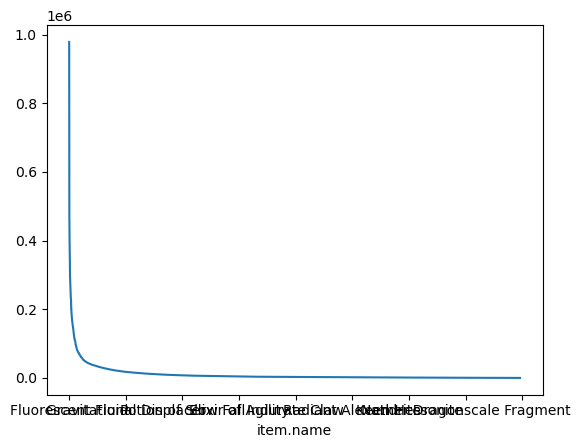

In [43]:
Blizzard_Commodities_DF['item.name'].value_counts().plot()

- item.class

In [44]:
Blizzard_Commodities_DF['item.class'].value_counts()

item.class
Trade Goods      43471369
Consumables      19247503
Unknown           7323232
Miscellaneous     6179978
Gems              2865191
Glyphs             734695
Armor               24651
Recipes              6211
Name: count, dtype: int64

<Axes: xlabel='item.class'>

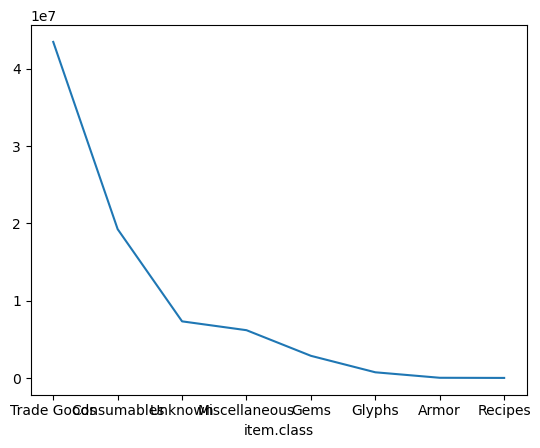

In [45]:
Blizzard_Commodities_DF['item.class'].value_counts().plot()

- date_time

In [46]:
Blizzard_Commodities_DF['datetime'].value_counts()

datetime
2024-01-03 05:41:00    315767
2024-01-03 06:41:00    315556
2024-01-03 07:41:00    312663
2024-01-03 03:41:00    312455
2024-01-03 00:41:00    311214
                        ...  
2023-12-25 16:41:00    255753
2023-12-25 19:41:00    255363
2023-12-30 16:41:00    254537
2023-12-25 17:41:00    253814
2023-12-25 18:41:00    253721
Name: count, Length: 285, dtype: int64

<Axes: xlabel='datetime'>

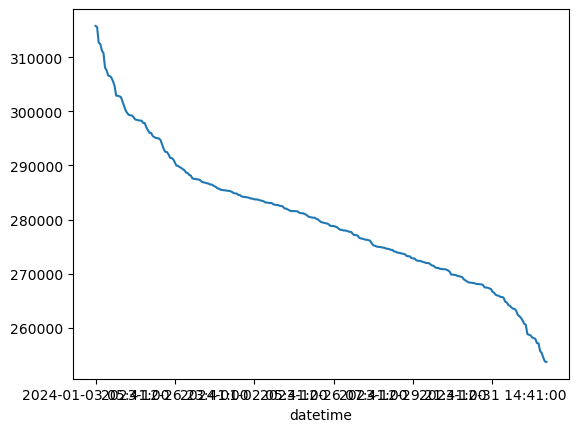

In [47]:
Blizzard_Commodities_DF['datetime'].value_counts().plot()

### ** Modify DF for easier analysis of datetime data

In [48]:
Blizzard_Commodities_DF['date']=pd.to_datetime(Blizzard_Commodities_DF['datetime']).dt.date
Blizzard_Commodities_DF['date']=pd.to_datetime(Blizzard_Commodities_DF['date'])
Blizzard_Commodities_DF['time']=pd.to_datetime(Blizzard_Commodities_DF['datetime']).dt.time
# Blizzard_Commodities_DF.drop(columns='datetime', inplace=True)

In [49]:
Blizzard_Commodities_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    object        
 8   date        datetime64[ns]
 9   time        object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 5.9+ GB


## Divide Blizzard_Commodities_DF in Blizzard_1 and Blizzard_2 

## and save as CSV to close the DF and use less memory

In [50]:
temp_df=Blizzard_Commodities_DF.iloc[0:int(79852830/2)]
temp_df.to_csv('Blizzard_1.csv')
temp_df=Blizzard_Commodities_DF.iloc[int(79852830/2):]
temp_df.to_csv('Blizzard_2.csv')
temp_df=[]

- date

In [51]:
Blizzard_Commodities_DF['date'].value_counts()

date
2023-12-27    6995127
2024-01-02    6938995
2023-12-28    6876115
2023-12-23    6807004
2023-12-24    6729335
2023-12-26    6660379
2023-12-31    6579628
2023-12-30    6518004
2024-01-01    6452228
2023-12-25    6361764
2023-12-29    6344696
2024-01-03    4902498
2023-12-22    1687057
Name: count, dtype: int64

<Axes: xlabel='date'>

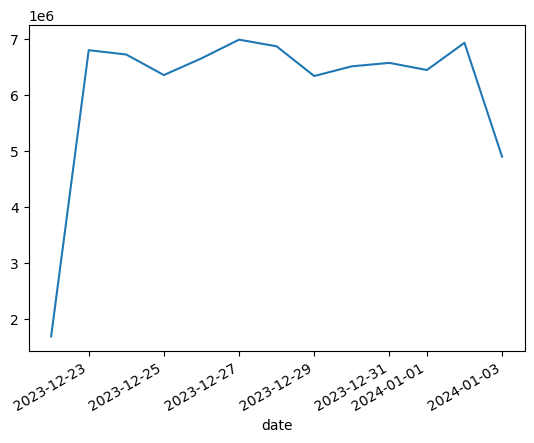

In [52]:
Blizzard_Commodities_DF['date'].value_counts().plot()

- time

In [53]:
Blizzard_Commodities_DF['time'].value_counts()

time
04:41:00    3456157
05:41:00    3450119
03:41:00    3442899
02:41:00    3434250
06:41:00    3429642
00:41:00    3427522
01:41:00    3422419
07:41:00    3407182
08:41:00    3390034
22:41:00    3377253
09:41:00    3370757
10:41:00    3347745
21:41:00    3333862
20:41:00    3314112
11:41:00    3313217
19:41:00    3308048
18:41:00    3307403
12:41:00    3301426
15:41:00    3296969
13:41:00    3289191
14:41:00    3280429
23:41:00    3125552
17:41:00    3017569
16:41:00    3009073
Name: count, dtype: int64

<Axes: xlabel='time'>

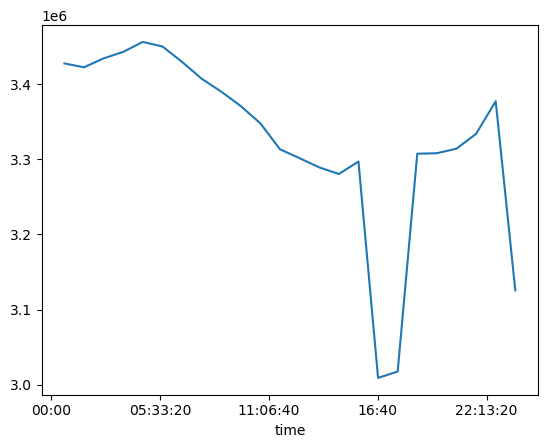

In [54]:
Blizzard_Commodities_DF['time'].value_counts().plot()

## Analysis based on 'item.name' column

In [55]:
item_name_count_df=pd.DataFrame(Blizzard_Commodities_DF['item.name'].value_counts())
item_name_count_df.reset_index()

,item.name,count
0,Fluorescent Fluid,978744
1,Exceptional Pelt,665069
2,Hochenblume,497568
3,Adamant Scales,465241
4,Resilient Leather,454930
...,...,...
7959,Masterful Mana Buns,2
7960,Blood Soaked Tail,1
7961,Emberflea Collection,1
7962,Elemental-Distilled Water,1


### The most offered item is 'Fluorescent Fluid', analysing data

In [56]:
fluorecent_fluid_df=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['item.name']=='Fluorescent Fluid']

In [ ]:
#Did not work as I expected
for column in fluorecent_fluid_df:
    try:
        display(f"Columns: {column}")
        display(fluorecent_fluid_df[column].value_counts())
    except Exception as err:
        print(err)
    try:
        display(fluorecent_fluid_df[column].value_counts().plot())
    except Exception as err:
        print(err)

In [57]:
fluorecent_fluid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978744 entries, 17 to 79852799
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          978744 non-null  int64         
 1   quantity    978744 non-null  int64         
 2   unit_price  978744 non-null  int64         
 3   time_left   978744 non-null  object        
 4   item.id     978744 non-null  int64         
 5   item.name   978744 non-null  object        
 6   item.class  978744 non-null  object        
 7   datetime    978744 non-null  object        
 8   date        978744 non-null  datetime64[ns]
 9   time        978744 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 82.1+ MB


In [58]:
fluorecent_fluid_df['id'].value_counts()

id
1920665016    50
1902771003    49
1902767818    49
1902767354    49
1902766698    49
              ..
1928105488     1
1928101860     1
1928100641     1
1928100308     1
1920047736     1
Name: count, Length: 37282, dtype: int64

<Axes: xlabel='id'>

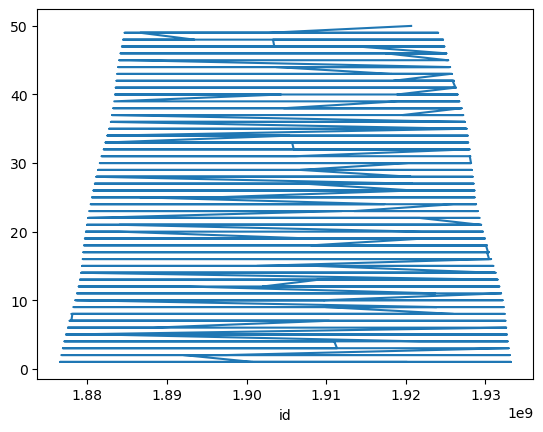

In [59]:
fluorecent_fluid_df['id'].value_counts().plot()

In [60]:
fluorecent_fluid_df['quantity'].value_counts()

quantity
1       188007
2       116251
3        71802
4        52698
6        48298
         ...  
274          1
1211         1
248          1
225          1
504          1
Name: count, Length: 367, dtype: int64

<Axes: xlabel='quantity'>

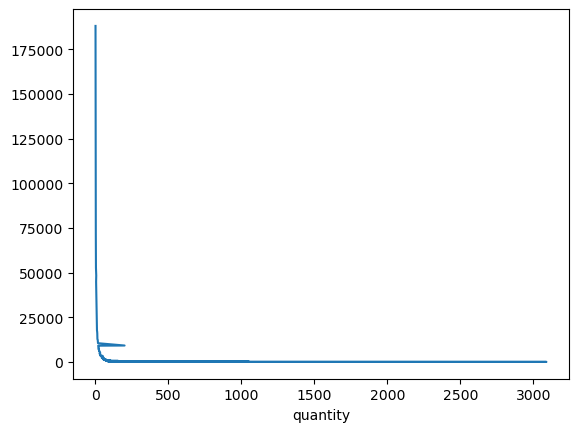

In [61]:
fluorecent_fluid_df['quantity'].value_counts().plot()

In [62]:
fluorecent_fluid_df['unit_price'].value_counts()

unit_price
6300         884821
9400          43379
74600          9218
10000          2774
6600           2703
              ...  
3500              2
100006200         2
5600              1
3200              1
2500              1
Name: count, Length: 148, dtype: int64

<Axes: xlabel='unit_price'>

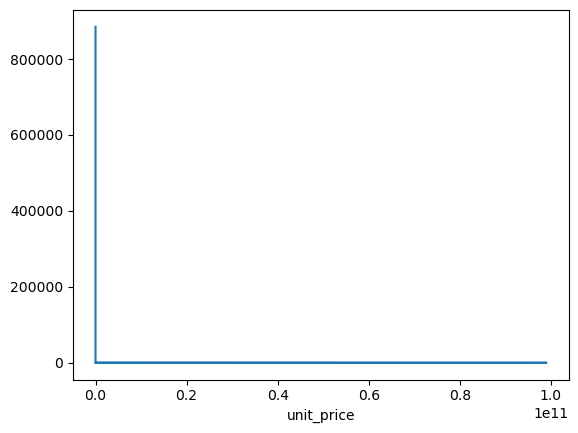

In [63]:
fluorecent_fluid_df['unit_price'].value_counts().plot()

In [64]:
fluorecent_fluid_df['time_left'].value_counts()

time_left
VERY_LONG    680771
LONG         250207
MEDIUM        35672
SHORT         12094
Name: count, dtype: int64

<Axes: xlabel='time_left'>

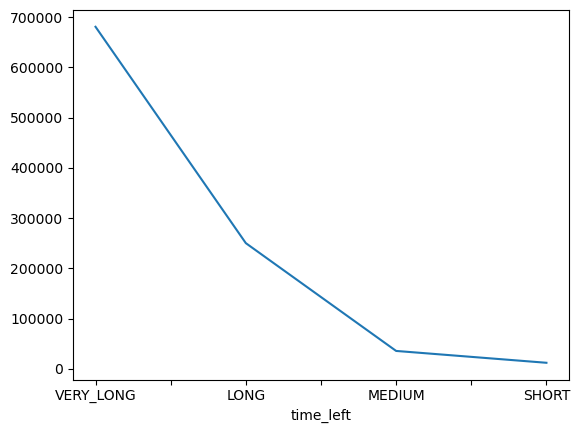

In [65]:
fluorecent_fluid_df['time_left'].value_counts().plot()

In [66]:
fluorecent_fluid_df['date'].value_counts()

date
2023-12-27    110414
2023-12-28    108682
2023-12-23     99650
2023-12-24     92633
2023-12-26     92544
2023-12-31     85393
2023-12-25     81734
2024-01-01     72222
2024-01-03     58656
2023-12-30     55231
2024-01-02     51113
2023-12-29     44852
2023-12-22     25620
Name: count, dtype: int64

<Axes: xlabel='date'>

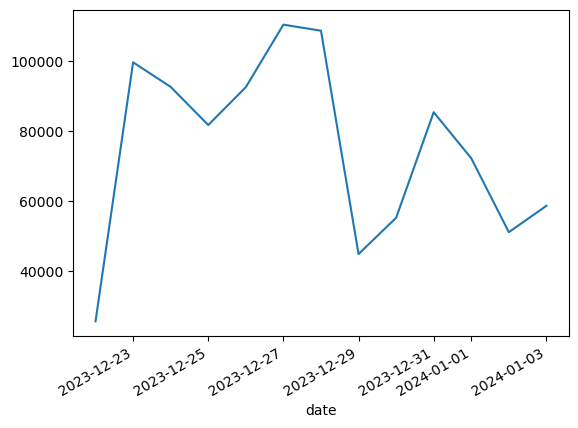

In [67]:
fluorecent_fluid_df['date'].value_counts().plot()

In [68]:
fluorecent_fluid_df['time'].value_counts()

time
07:41:00    43850
06:41:00    43779
05:41:00    43512
04:41:00    43189
03:41:00    42913
02:41:00    42379
01:41:00    42091
00:41:00    41680
15:41:00    40772
14:41:00    40623
22:41:00    40560
13:41:00    40500
12:41:00    40451
10:41:00    40437
09:41:00    40378
11:41:00    40332
08:41:00    40327
21:41:00    39951
23:41:00    39714
20:41:00    39563
19:41:00    38995
18:41:00    38510
17:41:00    37275
16:41:00    36963
Name: count, dtype: int64

<Axes: xlabel='time'>

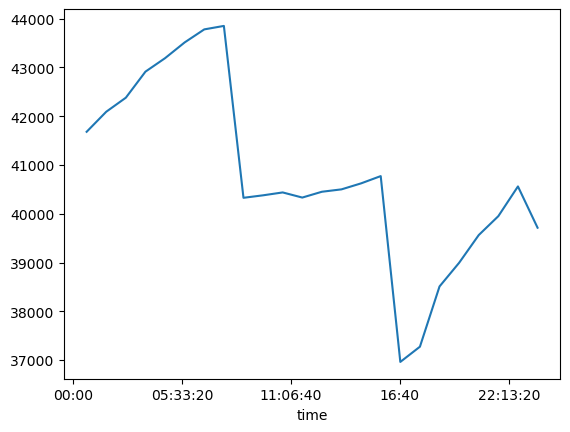

In [69]:
fluorecent_fluid_df['time'].value_counts().plot()

### Find the auction(s) the lasted the longest

### (Waste of 2 hrs to process, same results as 20 sec value_counts())

In [ ]:
# get the auction(s) that was live the longest
# max=0
# id_max=0
# max_ids=[]
# for id in fluorecent_fluid_df['id'].unique():
#     display(id)
#     days=fluorecent_fluid_df['date'].loc[fluorecent_fluid_df['id']==id]
#     if len(list(set(days)))>max:
#         max=len(list(set(days)))
#         id_max=id
#     if len(list(set(days)))==max:
#         max_ids.append(id)
#         display(f"id:{id} max with :{max}")
# display(id_max, max)

In [78]:
fluorecent_fluid_df.sort_values(['date','time'], ascending=[True,True])
fluorecent_fluid_df.head(30)

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime,date,time
17,1899751061,28,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
18,1899751205,84,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
24,1899752493,101,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
32,1899753275,24,7900,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
39,1899753849,109,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
42,1899754318,3,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
51,1899755426,2,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
61,1899756400,29,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
68,1899757569,2,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00
133,1899761589,4,6300,SHORT,192615,Fluorescent Fluid,Unknown,2023-12-28 15:41:00,2023-12-28,15:41:00


In [79]:
fluorecent_fluid_df.tail()

,id,quantity,unit_price,time_left,item.id,item.name,item.class,datetime,date,time
79851665,1910238223,20,6300,VERY_LONG,192615,Fluorescent Fluid,Unknown,2023-12-29 00:41:00,2023-12-29,00:41:00
79851763,1910238748,1,6300,VERY_LONG,192615,Fluorescent Fluid,Unknown,2023-12-29 00:41:00,2023-12-29,00:41:00
79852312,1910241065,4,6300,VERY_LONG,192615,Fluorescent Fluid,Unknown,2023-12-29 00:41:00,2023-12-29,00:41:00
79852419,1910241453,208,6300,VERY_LONG,192615,Fluorescent Fluid,Unknown,2023-12-29 00:41:00,2023-12-29,00:41:00
79852799,1910242768,2,6300,VERY_LONG,192615,Fluorescent Fluid,Unknown,2023-12-29 00:41:00,2023-12-29,00:41:00


In [80]:
Exceptional_Pelt_df=Blizzard_Commodities_DF.loc[Blizzard_Commodities_DF['item.name']=='Exceptional Pelt']

In [81]:
Exceptional_Pelt_df.to_csv('Exceptional_Pelt.csv',index=False)

## Group DF by item.name

In [82]:
Blizzard_Commodities_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79852830 entries, 0 to 79852829
Data columns (total 10 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   quantity    int64         
 2   unit_price  int64         
 3   time_left   object        
 4   item.id     int64         
 5   item.name   object        
 6   item.class  object        
 7   datetime    object        
 8   date        datetime64[ns]
 9   time        object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 5.9+ GB


In [83]:
now=datetime.now()
# grouped_DF=Blizzard_Commodities_DF['id','quantity','unit_price','item.name'].groupby('item.name').sum()
grouped_DF=Blizzard_Commodities_DF[['id','quantity','unit_price','item.name']]
print(F"Time elapsed {datetime.now()-now}")

Time elapsed 0:00:00.814082


In [84]:
grouped_DF

,id,quantity,unit_price,item.name
0,1899749198,15,109400,Potion of the Psychopomp's Speed
1,1899749311,1,2000,Cragscale
2,1899749353,6,2400,Tidespray Linen
3,1899749415,2,290200,Burning Primal Diamond
4,1899749701,1,9707000,Glyph of Mana Touched Souls
...,...,...,...,...
79852825,1910242848,12,25200,Lava Beetle
79852826,1910242860,3,30600,Saxifrage
79852827,1910242862,3,1500000,Stonecrust Hide
79852828,1910242863,2,25200,Lava Beetle


In [85]:
start=datetime.now()
print(f"({start}) Export item.name and (price, quantity) columns ...")

(2024-01-10 14:39:54.159475) Export item.name and (price, quantity) columns ...


In [86]:
# grouped_DF=Blizzard_Commodities_DF[['id','quantity','unit_price','item.name']].groupby('item.name').sum()
name_price_df=Blizzard_Commodities_DF[['item.name','unit_price']]
name_quantity_df=Blizzard_Commodities_DF[['item.name','quantity']]
print(F"Time elapsed {datetime.now()-start}")

Time elapsed 0:00:01.626269


In [87]:
start=datetime.now()
print(f"({start}) Groupping by item.name and summing quantity and unit_price columns ...")

(2024-01-10 14:39:55.793128) Groupping by item.name and summing quantity and unit_price columns ...


In [88]:
datetime.now()
grouped_DF

,id,quantity,unit_price,item.name
0,1899749198,15,109400,Potion of the Psychopomp's Speed
1,1899749311,1,2000,Cragscale
2,1899749353,6,2400,Tidespray Linen
3,1899749415,2,290200,Burning Primal Diamond
4,1899749701,1,9707000,Glyph of Mana Touched Souls
...,...,...,...,...
79852825,1910242848,12,25200,Lava Beetle
79852826,1910242860,3,30600,Saxifrage
79852827,1910242862,3,1500000,Stonecrust Hide
79852828,1910242863,2,25200,Lava Beetle


In [89]:
start=datetime.now()
print(f"({start}) Groupping by item.name and summing quantity and unit_price columns ...")

(2024-01-10 14:40:43.629585) Grupping by item.name and summing quantity and unit_price columns ...


In [90]:
name_price_df.sum()

In [ ]:
import gc

In [ ]:
del Blizzard_Commodities_DF

In [ ]:
gc.collect()

In [ ]:
blizzard_1_df=pd.read_csv('blizzard_2.csv')
blizzard_1_df

In [ ]:
blizzard_1_df.columns

In [ ]:
blizzard_1_df.drop(columns=['Unnamed: 0', 'time_left', 'item.id',
       'id', 'item.class', 'datetime', 'date', 'time'],axis=1,inplace=True)

In [ ]:
blizzard_1_df.columns

In [ ]:
now=datetime.now()
now

In [ ]:
numeric_columns_df=Blizzard_Commodities_DF[['quantity', 'unit_price', 'item.name']]

In [ ]:
groupby_df=numeric_columns_df.groupby('item.name').sum()

In [ ]:
numeric_columns_df

In [ ]:
groupby_df

In [ ]:
groupby_df['average_price']=groupby_df['unit_price']/groupby_df['quantity']

In [ ]:
groupby_df['price_mode']=statistics.mode(groupby_df['unit_price'])

In [ ]:
groupby_df.iloc[0]

In [ ]:
groupby_df.reset_index(inplace=True)

In [ ]:
groupby_df.sort_values('unit_price')